1/1 [==============================] - 3s 3s/step


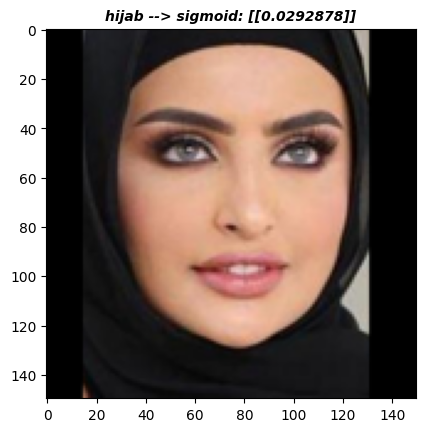

1/1 [==============================] - 0s 37ms/step


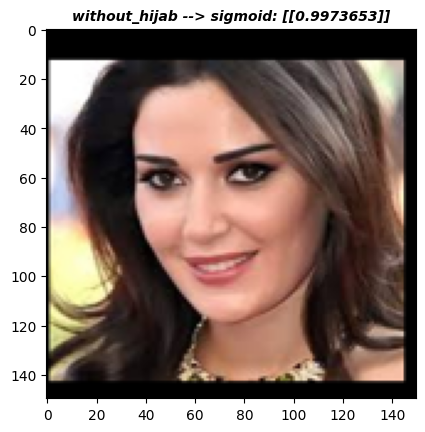

1/1 [==============================] - 0s 30ms/step


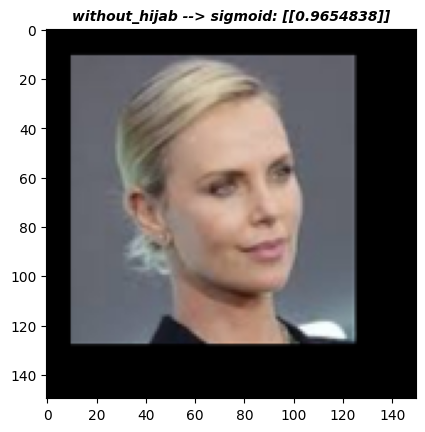

1/1 [==============================] - 0s 33ms/step


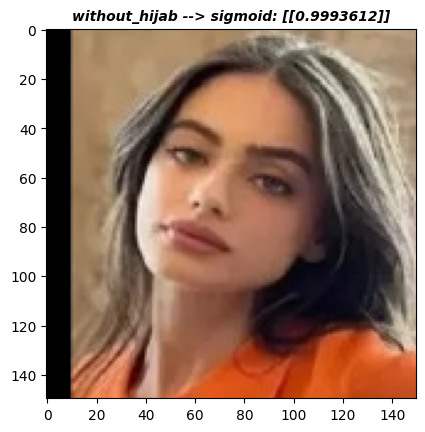

1/1 [==============================] - 0s 41ms/step


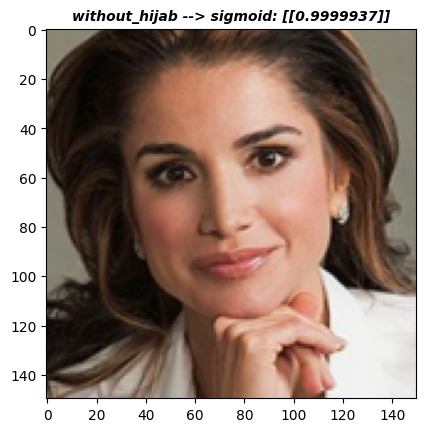

1/1 [==============================] - 0s 33ms/step


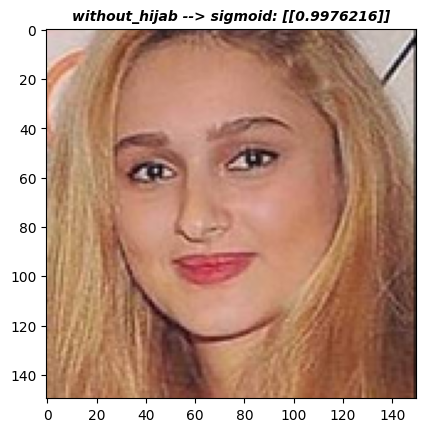

1/1 [==============================] - 0s 38ms/step


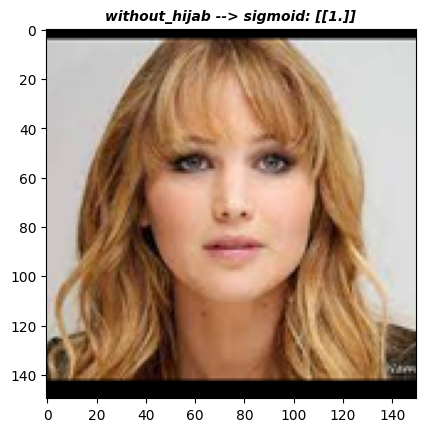

1/1 [==============================] - 0s 36ms/step


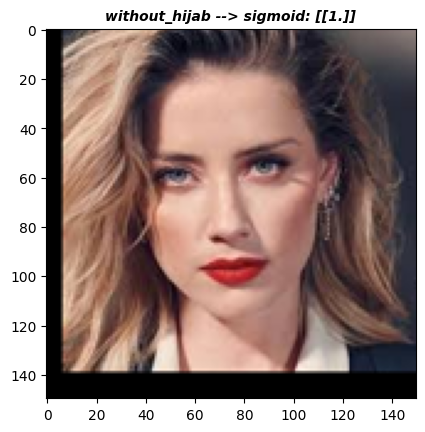

1/1 [==============================] - 0s 35ms/step


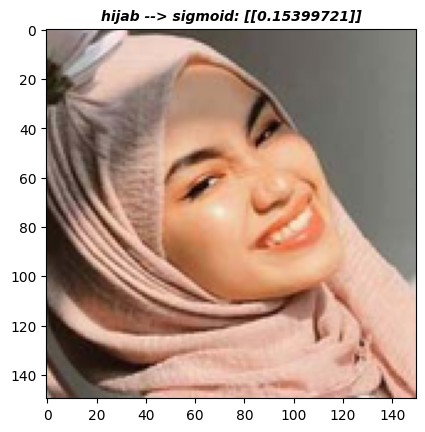

1/1 [==============================] - 0s 32ms/step


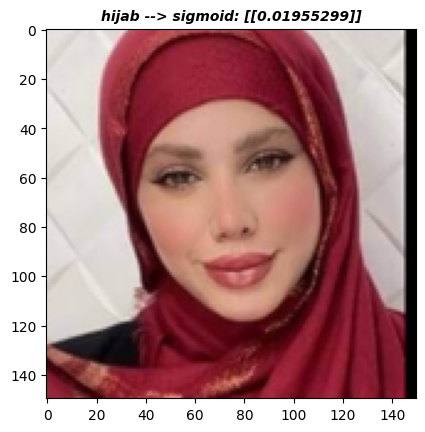

1/1 [==============================] - 0s 31ms/step


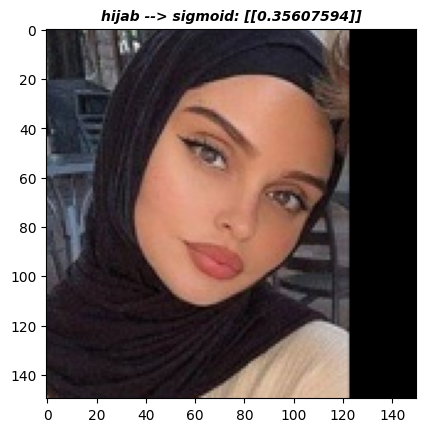

1/1 [==============================] - 0s 28ms/step


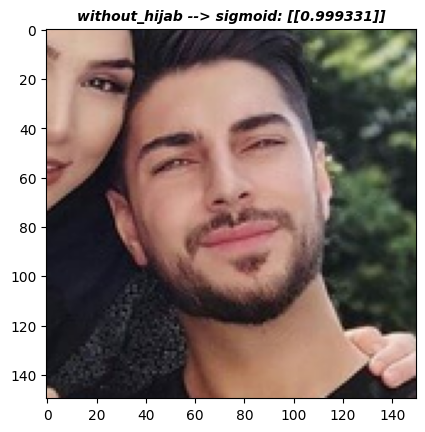

1/1 [==============================] - 0s 29ms/step


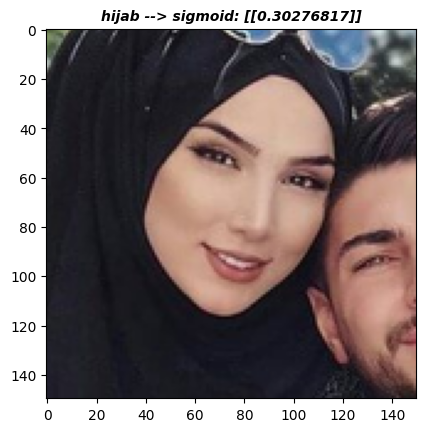

1/1 [==============================] - 0s 34ms/step


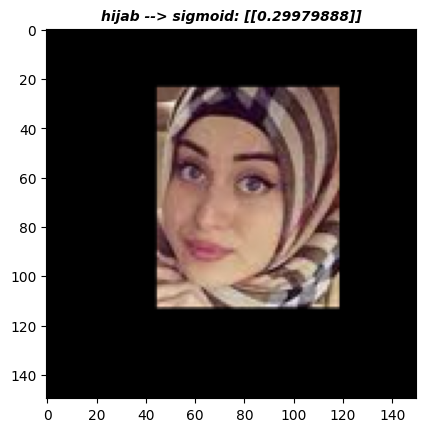

1/1 [==============================] - 0s 33ms/step


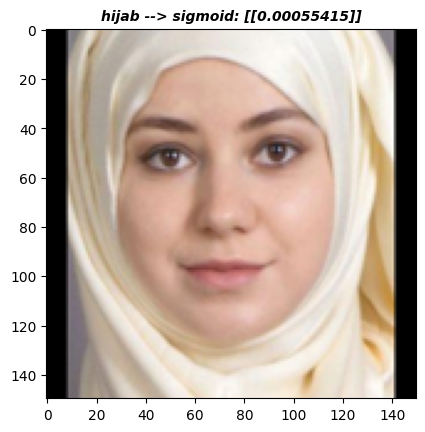

1/1 [==============================] - 0s 30ms/step


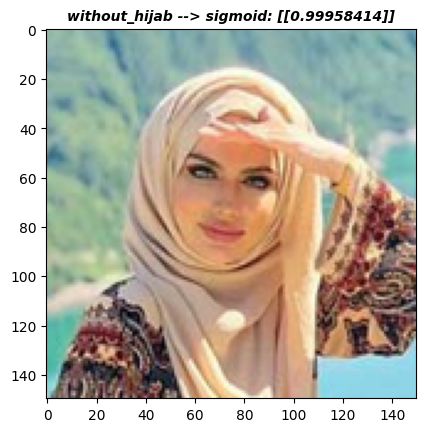

1/1 [==============================] - 0s 49ms/step


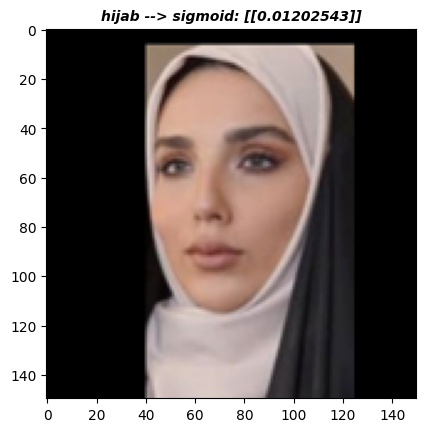

1/1 [==============================] - 0s 29ms/step


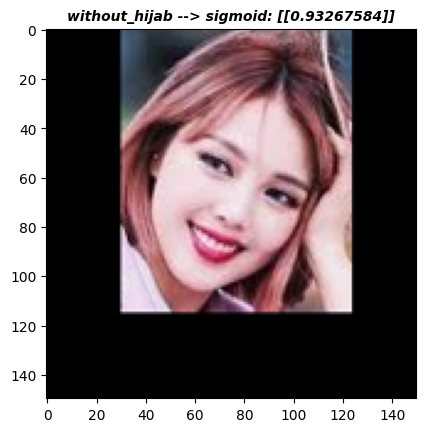

In [1]:

## Hijab Detection model testing on new images


# load used libraries
import os
import json # using json to retrieve the information of a file in the form of a dictionary
from keras.models import load_model # to load the trained model # to load the saved model
import cv2 # for reading images
import mediapipe as mp # for face detection
import keras.utils as image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# retrieve values of text file as dictionary variable
with open('./train_dictionary.txt', 'r') as file:
    train_dictionary = json.load(file)


# creating a function to identify labels according to the number that the model has chosen for that label
def get_class_name(dictionary, l):
    for name, label in dictionary.items():
        if label == l:
            return name


# load the trained model
model = load_model('Hijab_Detection.h5')

# create a Face Detection object
fd = mp.solutions.face_detection.FaceDetection(min_detection_confidence=0.5)

# there are some new images in this folder that the model has not seen
test_dir = "./test-images"


for root, dirs, files in os.walk(test_dir):
    
    for i in range(len(files)):
        
        path = os.path.join(test_dir, files[i])
        
        # read the images in the folder
        picture = cv2.imread(path)
        
        # convert picture to RGB format
        picture = cv2.cvtColor(picture, cv2.COLOR_BGR2RGB)
        
        # process picture with Face Detection
        result = fd.process(picture)
        
        # get detections attribute from result object
        detections = result.detections
        
        if detections:
            
            # loop over detected faces
            for detection in detections:
                
                # get bounding box coordinates of face
                ih, iw, ic = picture.shape
                
                # a border to reveal the cover of hijab or hair on the side of the person's face
                margin = 50
                
                xmin = int(detection.location_data.relative_bounding_box.xmin * iw - margin)
                
                ymin = int(detection.location_data.relative_bounding_box.ymin * ih - margin)
                
                width = int((detection.location_data.relative_bounding_box.xmin + detection.location_data.relative_bounding_box.width) * iw + margin)
                
                height = int((detection.location_data.relative_bounding_box.ymin + detection.location_data.relative_bounding_box.height) * ih + margin)
                
                # diagnosed box around the face
                box = (xmin,ymin,width,height)
                
                img = Image.open(path)
                
                # faces are detected and cropped from the original image to be fed to the model
                img = img.crop(box)
                
                # resize images of faces to enter the model
                # images must have a size of 150x150 to enter the model
                img = img.resize((150, 150))
                
                x = image.img_to_array(img)
                
                x = np.expand_dims(x,axis=0)
                
                x = x / 255.
                
                # prediction of the model according to each face in the image
                feature = model.predict(x)
                
                predicted = np.round(feature)
                
                text = get_class_name(train_dictionary, predicted)
                
                # it displays the model detection and sigmoid function value for each face as text at the top of the box
                plt.title(
                    f"{text} --> sigmoid: {feature}",
                    fontsize='medium',
                    loc='center',
                    fontweight='bold',
                    style='italic')
                
                plt.axis("on")
                
                # display of recognized faces with matplotlib
                plt.imshow(img)
                
                plt.show()
